In [43]:
import yt
import xarray as xr
import numpy as np
ddir = "/home/chavlin/hdd/data/yt_data/IRIS_models/"

In [2]:

modelfile='NWUS11-S_percent.nc'

In [17]:
xr_ds = xr.open_dataset(ddir+modelfile)

In [19]:
# new_index = ["boston", "austin", "seattle", "lincoln"]

# x.reindex({"station": new_index})
# <xarray.Dataset>

xr_ds.indexes
new_index = ['depth','latitude','longitude']

depth: Float64Index([  50.0,   75.0,  100.0,  125.0,  150.0,  175.0,  200.0,  225.0,
                      250.0,  275.0,  300.0,  325.0,  350.0,  375.0,  400.0,  425.0,
                      450.0,  475.0,  500.0,  525.0,  550.0,  575.0,  600.0,  625.0,
                      650.0,  675.0,  700.0,  725.0,  750.0,  775.0,  800.0,  825.0,
                      850.0,  875.0,  900.0,  925.0,  950.0,  975.0, 1000.0, 1050.0,
                     1100.0, 1150.0, 1200.0],
                    dtype='float64', name='depth')
latitude: Float64Index([ 32.0,  33.0,  34.0,  34.5,  35.0,  35.5,  36.0, 36.25,  36.5,
                        36.75,  37.0, 37.25,  37.5, 37.75,  38.0, 38.25,  38.5, 38.75,
                         39.0, 39.25,  39.5, 39.75,  40.0, 40.25,  40.5, 40.75,  41.0,
                        41.25,  41.5, 41.75,  42.0, 42.25,  42.5, 42.75,  43.0, 43.25,
                         43.5, 43.75,  44.0, 44.25,  44.5, 44.75,  45.0, 45.25,  45.5,
                        45.75,  46.0, 46.25

In [46]:
xr_ds

<xarray.Dataset>
Dimensions:    (depth: 43, latitude: 69, longitude: 85)
Coordinates:
  * depth      (depth) float32 50.0 75.0 100.0 125.0 ... 1100.0 1150.0 1200.0
  * latitude   (latitude) float32 32.0 33.0 34.0 34.5 ... 51.5 52.0 53.0 54.0
  * longitude  (longitude) float32 -130.0 -129.0 -128.0 ... -106.0 -105.0 -104.0
Data variables:
    dvs        (depth, latitude, longitude) float32 ...
Attributes:
    title:                         NWUS11-S
    id:                            NWUS11-S_percent
    summary:                       The model represents Vs velocity perturbat...
    keywords:                      seismic, tomography, shear wave, s wave, e...
    Conventions:                   CF-1.0
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    acknowledgment:                Model was provided by Matthew J. Fouch, \n...
    history:                       2019-12-05 IRIS DMC, updated geospatial fi...
    comment:                       model converted to netCDF by IRIS EMC
    geospatial_lat_min:            32.0
    geospatial_lat_max:            54.0
    geospatial_lat_units:          degrees_north
    geospatial_lat_resolution:     1
    geospatial_lon_min:            -130.0
    geospatial_lon_max:            -104.0
    geospatial_lon_units:          degrees_east
    geospatial_lon_resolution:     1
    geospatial_vertical_min:       50
    geospatial_vertical_max:       1200
    geospatial_vertical_units:     km
    geospatial_vertical_positive:  down
    NCO:                           netCDF Operators version 4.7.5 (Homepage =...
    netcdf_file:                   NWUS11-S_percent.nc
    reference:                     James, Fouch, Carlson and Roth (2011)
    reference_pid:                 doi:10.1016/j.epsl.2011.09.007
    author_name:                   David E. James
    author_email:                  james@dtm.ciw.edu
    author_institution:            Department of Terrestrial Magnetism, Carne...
    author_url:                    
    repository_name:               EMC
    repository_institution:        IRIS DMC
    repository_pid:                doi:10.17611/DP/9991669

In [47]:
dvs = yt.YTArray(xr_ds.dvs.values,xr_ds.dvs.units)

In [48]:
bbox = np.array([
    (xr_ds[dim].values[:].min(),xr_ds[dim].values[:].max()) for dim in xr_ds.dvs.dims
])
bbox

array([[  50., 1200.],
       [  32.,   54.],
       [-130., -104.]], dtype=float32)

In [49]:
ds = yt.load_uniform_grid({'dvs':dvs},dvs.shape, bbox = bbox)

yt : [INFO     ] 2021-01-11 11:39:12,674 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-01-11 11:39:12,674 Parameters: domain_dimensions         = [43 69 85]
yt : [INFO     ] 2021-01-11 11:39:12,675 Parameters: domain_left_edge          = [  50.   32. -130.]
yt : [INFO     ] 2021-01-11 11:39:12,675 Parameters: domain_right_edge         = [1200.   54. -104.]
yt : [INFO     ] 2021-01-11 11:39:12,675 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-01-11 11:41:35,518 xlim = 32.000000 54.000000
yt : [INFO     ] 2021-01-11 11:41:35,520 ylim = -130.000000 -104.000000
yt : [INFO     ] 2021-01-11 11:41:35,523 xlim = 32.000000 54.000000
yt : [INFO     ] 2021-01-11 11:41:35,525 ylim = -130.000000 -104.000000
yt : [INFO     ] 2021-01-11 11:41:35,528 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2021-01-11 11:41:35,558 Plot image for field ('stream', 'dvs') has both positive and negative values. Min = -4.176270, Max = 2.659150.
yt : [WARNING  ] 2021-01-11 11:41:35,558 Switching to symlog colorbar scaling unless linear scaling is specified later



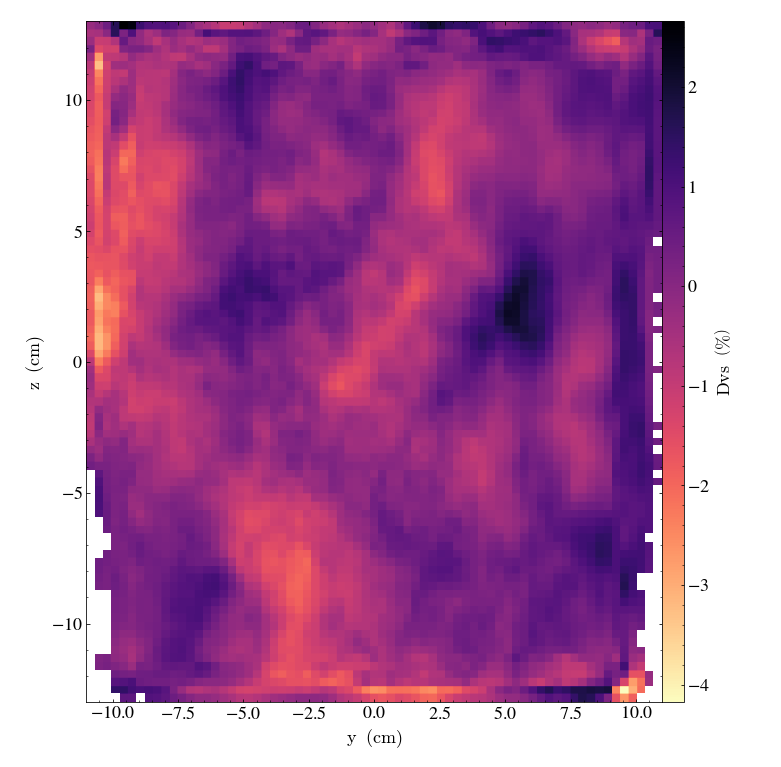

In [58]:
slc = yt.SlicePlot(ds,normal='x',fields='dvs')
slc.set_log('dvs',False)
slc.set_cmap('dvs','magma_r')

yt : [INFO     ] 2021-01-11 11:45:27,223 Projection completed
yt : [INFO     ] 2021-01-11 11:45:27,224 xlim = 32.000000 54.000000
yt : [INFO     ] 2021-01-11 11:45:27,224 ylim = -130.000000 -104.000000
yt : [INFO     ] 2021-01-11 11:45:27,225 xlim = 32.000000 54.000000
yt : [INFO     ] 2021-01-11 11:45:27,225 ylim = -130.000000 -104.000000
yt : [INFO     ] 2021-01-11 11:45:27,226 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2021-01-11 11:45:27,244 Plot image for field ('stream', 'dvs') has both positive and negative values. Min = -70.289440, Max = 49.113960.
yt : [WARNING  ] 2021-01-11 11:45:27,245 Switching to symlog colorbar scaling unless linear scaling is specified later



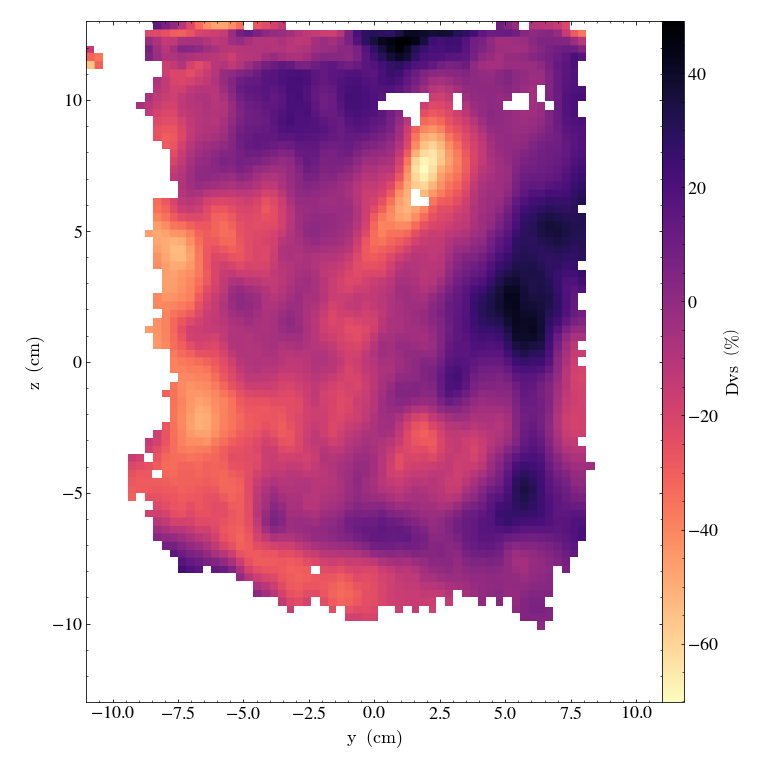

In [66]:
proj = yt.ProjectionPlot(ds,axis='x',fields=['dvs'],method='sum')
proj.set_log('dvs',False)
proj.set_cmap('dvs','magma_r')

In [73]:
upper_mantle = ds.region(ds.domain_center,np.array([100,32,-130]),np.array([400,54,-104]))

yt : [INFO     ] 2021-01-11 11:50:19,967 Projection completed
yt : [INFO     ] 2021-01-11 11:50:19,968 xlim = 32.000000 54.000000
yt : [INFO     ] 2021-01-11 11:50:19,969 ylim = -130.000000 -104.000000
yt : [INFO     ] 2021-01-11 11:50:19,970 xlim = 32.000000 54.000000
yt : [INFO     ] 2021-01-11 11:50:19,970 ylim = -130.000000 -104.000000
yt : [INFO     ] 2021-01-11 11:50:19,971 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
yt : [WARNING  ] 2021-01-11 11:50:19,990 Plot image for field ('stream', 'dvs') has both positive and negative values. Min = -27.301470, Max = 26.619990.
yt : [WARNING  ] 2021-01-11 11:50:19,991 Switching to symlog colorbar scaling unless linear scaling is specified later



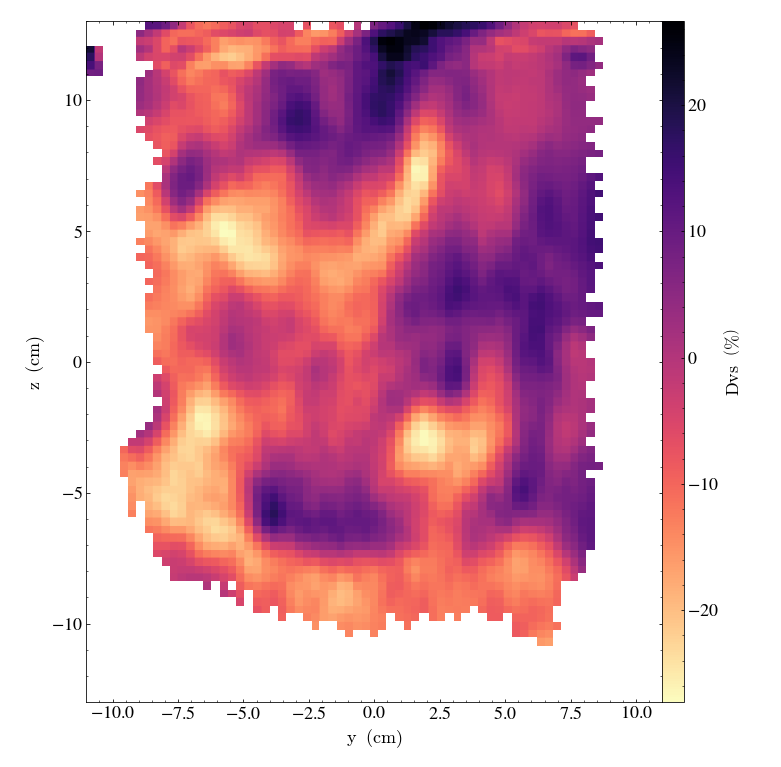

In [74]:
proj = yt.ProjectionPlot(ds,axis='x',fields=['dvs'],method='sum',data_source=upper_mantle)
proj.set_log('dvs',False)
proj.set_cmap('dvs','magma_r')

In [18]:
import yt
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from obspy.taup import TauPyModel
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from geopy.distance import geodesic
from pygeodesy.sphericalNvector import LatLon
import cartopy.crs as ccrs
ddir = "/home/chavlin/hdd/data/yt_data/IRIS_models/"

In [2]:
modelfile='DBRD-NATURE2020-depth.nc'
xr_ds = xr.open_dataset(ddir+modelfile)

In [3]:
xr_ds

<xarray.Dataset>
Dimensions:    (depth: 29, latitude: 90, longitude: 180)
Coordinates:
  * latitude   (latitude) float32 89.0 87.0 85.0 83.0 ... -85.0 -87.0 -89.0
  * longitude  (longitude) float32 1.0 3.0 5.0 7.0 ... 353.0 355.0 357.0 359.0
  * depth      (depth) float32 50.0 70.0 90.0 100.0 ... 590.0 610.0 625.0 650.0
Data variables:
    dvs        (depth, latitude, longitude) float32 ...
    lQ         (depth, latitude, longitude) float32 ...
    mp         (depth, latitude, longitude) float32 ...
Attributes:
    title:                         Data for 'Seismic evidence for partial mel...
    id:                            DBRD_NATURE2020
    summary:                       This dataset contains 3 seismic models : D...
    keywords:                      seismic, tomography, S-waves, isotropic Vo...
    Conventions:                   CF-1.0
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    acknowledgment:                French ANR Seisglob ANR-11-BLANC-SIMI5-6-0...
    history:                       New Model July 2020
    comment:                       model converted to netCDF by Fabien Dubuffet
    geospatial_lat_min:            -90.0
    geospatial_lat_max:            +90.0
    geospatial_lat_units:          degrees_north
    geospatial_lat_resolution:     2.
    geospatial_lon_min:            0.0
    geospatial_lon_max:            360.0
    geospatial_lon_units:          degrees_east
    geospatial_lon_resolution:     2.
    geospatial_vertical_min:       50
    geospatial_vertical_max:       650.
    geospatial_vertical_units:     km
    geospatial_vertical_positive:  down
    NCO:                           netCDF Operators version 4.7.5 (Homepage =...
    netcdf_file:                   DBRD_NATURE2020_depth.nc
    reference:                     Debayle, E., T. Bodin, Y. Ricard and S. Du...
    reference_pid:                 not provide yet
    author_name:                   Eric Debayle
    author_email:                  Eric.Debayle@ens-lyon.fr
    author_institution:            Univ Lyon, Univ Lyon 1, ENSL, CNRS, LGL-TP...
    author_url:                    http://perso.ens-lyon.fr/eric.debayle/
    repository_name:               EMC
    repository_institution:        IRIS DMC
    repository_pid:                doi:10.17611/DP/emc.2020.dbrdnature.1

In [4]:
xr_ds.dvs

<xarray.DataArray 'dvs' (depth: 29, latitude: 90, longitude: 180)>
[469800 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 89.0 87.0 85.0 83.0 ... -85.0 -87.0 -89.0
  * longitude  (longitude) float32 1.0 3.0 5.0 7.0 ... 353.0 355.0 357.0 359.0
  * depth      (depth) float32 50.0 70.0 90.0 100.0 ... 590.0 610.0 625.0 650.0
Attributes:
    long_name:     Vs anomaly in %
    display_name:  100*dVs/Vs_ref
    units:         %

In [5]:
# ooooooooooooooooooooooooooh the lat goes backwards. 

In [6]:
data = {fld: xr_ds[fld].values[:,::-1,:] for fld in ['dvs','lQ','mp']}
data['mp'][data['mp']<0]=0 # not sure what the neg values are
data['mp'][np.isnan(data['mp'])]=0

In [7]:
bbox = np.array([
    (xr_ds[dim].values[:].min(),xr_ds[dim].values[:].max()) for dim in xr_ds.dvs.dims
])
bbox[1][0]=-89.99
bbox[1][1]=89.99
bbox[2][0]=0.001
bbox[2][1]=360 - 0.001

bbox

array([[ 5.00000e+01,  6.50000e+02],
       [-8.99900e+01,  8.99900e+01],
       [ 1.00000e-03,  3.59999e+02]], dtype=float32)

In [8]:
data['dvs'].shape

(29, 90, 180)

In [9]:
xr_ds.lQ.max()

<xarray.DataArray 'lQ' ()>
array(7.463779, dtype=float32)

In [10]:
ds = yt.load_uniform_grid(data,data['dvs'].shape,1.0,bbox = bbox, geometry=("internal_geographic",['depth','latitude','longitude']))

yt : [INFO     ] 2021-01-14 10:03:21,592 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-01-14 10:03:21,593 Parameters: domain_dimensions         = [ 29  90 180]
yt : [INFO     ] 2021-01-14 10:03:21,593 Parameters: domain_left_edge          = [ 5.00000000e+01 -8.99899979e+01  1.00000005e-03]
yt : [INFO     ] 2021-01-14 10:03:21,593 Parameters: domain_right_edge         = [650.          89.98999786 359.99899292]
yt : [INFO     ] 2021-01-14 10:03:21,594 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-01-14 10:06:42,816 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2021-01-14 10:06:42,819 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:06:42,820 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:06:42,822 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:06:42,823 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:06:42,827 Making a fixed resolution buffer of (('stream', 'dvs')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)



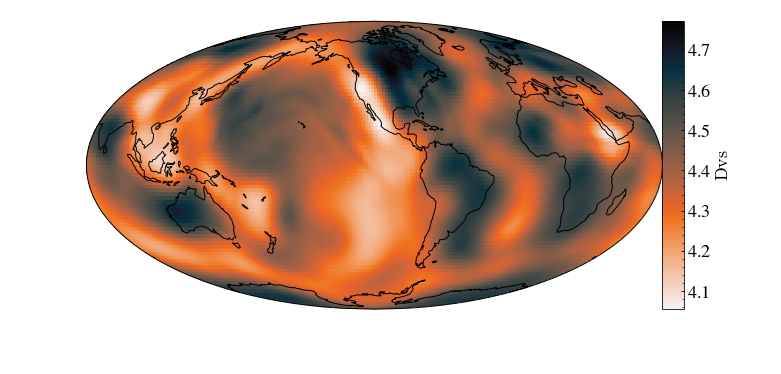

In [13]:

target_depth = 100
center = ds.domain_center
p = yt.SlicePlot(ds,"depth",'dvs',center=[target_depth,center[1],center[2]]) 
p.set_cmap('dvs', 'dusk_r')
p.set_log('dvs', False)
 
p.set_mpl_projection(('Mollweide', (), {'central_longitude':-110}))#{'central_longitude':-100, 'central_latitude':40}))

p._setup_plots()

p.plots['dvs'].axes.coastlines()
p.show()




yt : [INFO     ] 2021-01-14 10:10:20,298 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2021-01-14 10:10:20,300 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:10:20,300 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:10:20,301 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:10:20,302 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:10:20,303 Making a fixed resolution buffer of (('stream', 'mp')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)



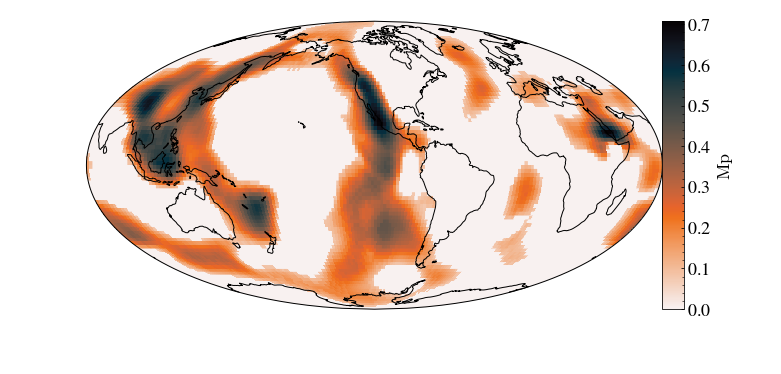

In [14]:

target_depth = 100
center = ds.domain_center
p = yt.SlicePlot(ds,"depth",'mp',center=[target_depth,center[1],center[2]]) 
p.set_cmap('mp', 'dusk_r')
p.set_log('mp', False)
 
p.set_mpl_projection(('Mollweide', (), {'central_longitude':-110}))#{'central_longitude':-100, 'central_latitude':40}))

p._setup_plots()

p.plots['mp'].axes.coastlines()
p.show()




In [43]:
ds.field_list

[('stream', 'dvs'), ('stream', 'lQ'), ('stream', 'mp')]


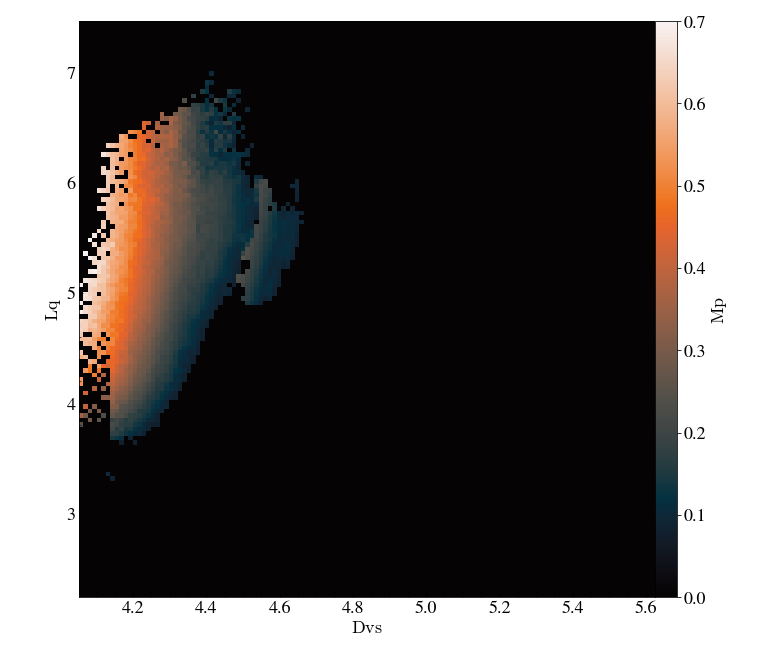

In [45]:
p = yt.PhasePlot(ds,'dvs','lQ',['mp'],weight_field='mp')
p.set_log('mp',False)
p.set_cmap('mp','dusk')
p.set_zlim('mp',0,0.7)
p.set_log('dvs',False)
p.set_log('lQ',False)
p.show()

yt : [INFO     ] 2021-01-14 10:11:59,803 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2021-01-14 10:11:59,823 Projection completed
yt : [INFO     ] 2021-01-14 10:11:59,824 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:11:59,824 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:11:59,826 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:11:59,826 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:11:59,827 Making a fixed resolution buffer of (('stream', 'mp')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)



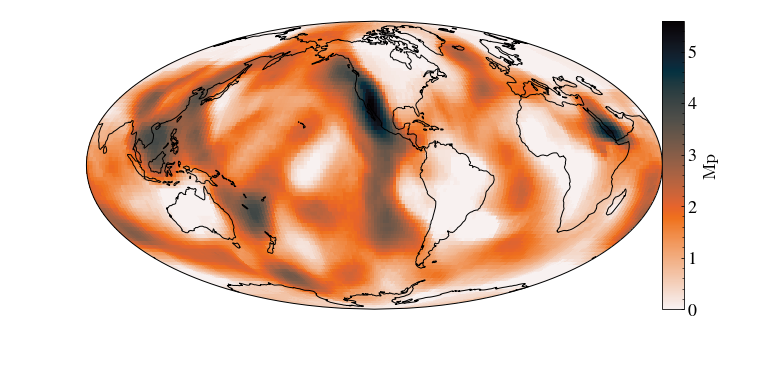

In [17]:
proj = yt.ProjectionPlot(ds,axis='depth',fields=['mp'],method='sum')
proj.set_cmap('mp','dusk_r')
proj.set_log('mp',False)
proj.set_mpl_projection(('Mollweide', (), {'central_longitude':-110}))#{'central_longitude':-100, 'central_latitude':40}))

proj._setup_plots()

proj.plots['mp'].axes.coastlines()
proj.show()


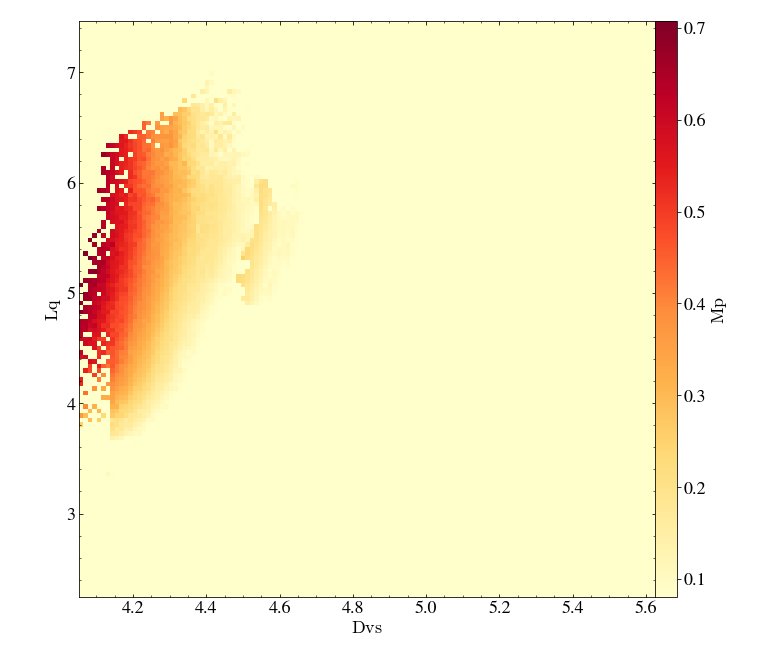

In [85]:
p = yt.PhasePlot(ds,'dvs','lQ',['mp'],weight_field='mp')
p.set_log('mp',False)
p.set_cmap('mp','YlOrRd')
# p.set_zlim('mp',0,0.7)
p.set_log('dvs',False)
p.set_log('lQ',False)
p.show()


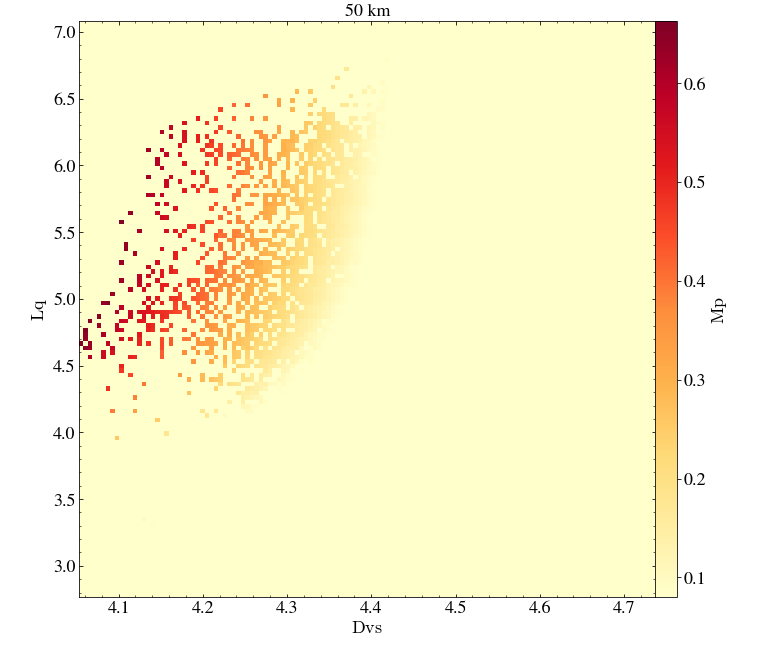


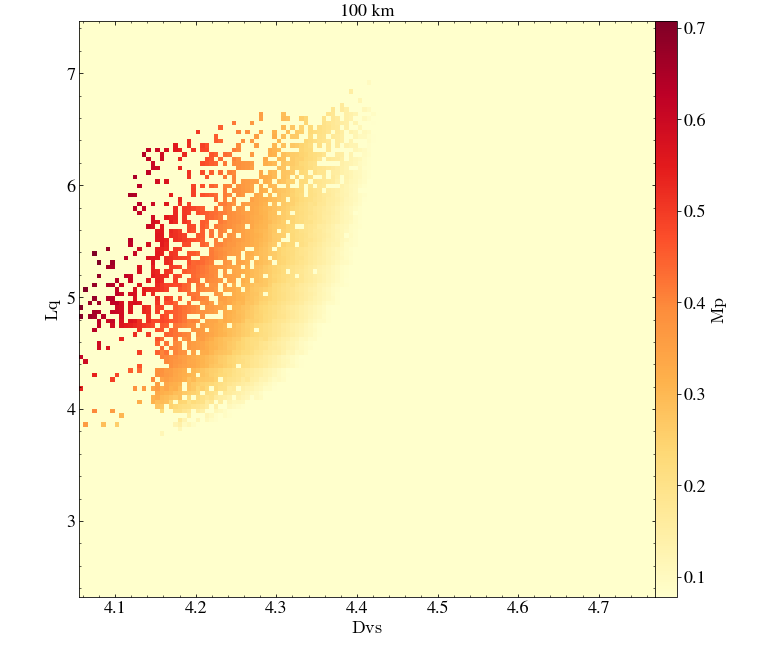


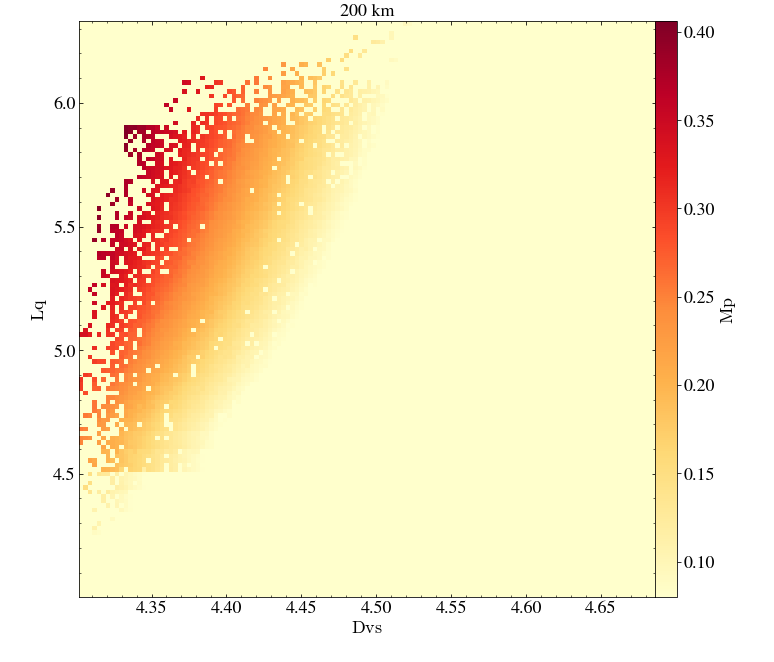


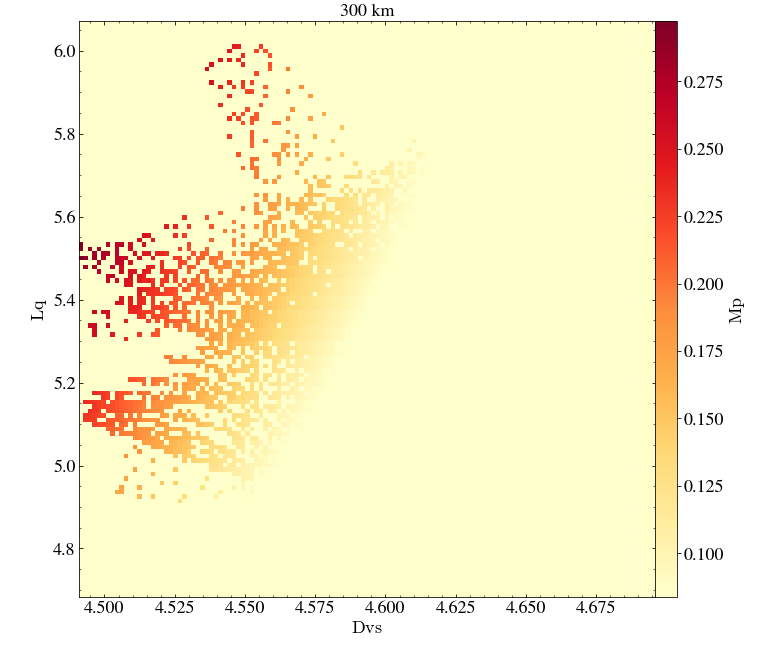

In [82]:
for target_depth in [50,100,200,300]:
    slc = ds.slice("depth",target_depth)
    p = yt.PhasePlot(slc,'dvs','lQ',['mp'],weight_field='mp')
    p.set_log('mp',False)
    p.set_cmap('mp','YlOrRd')
#     p.set_zlim('mp',0,0.7)
    p.set_log('dvs',False)
    p.set_log('lQ',False)
    p.set_title('mp',title=f"{target_depth} km")
    p.show()


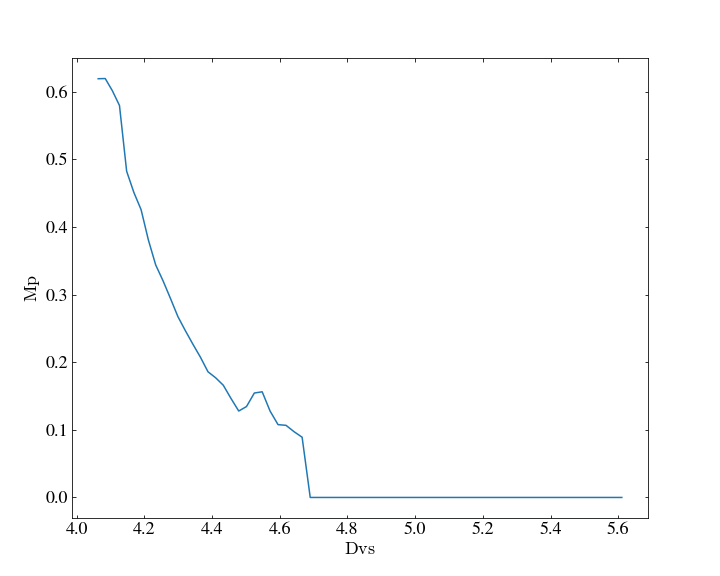

In [80]:
prof = yt.ProfilePlot(ds, 'dvs', 'mp', weight_field='mp')
prof.set_log('dvs',False)
prof.set_log('mp',False)
prof.show()


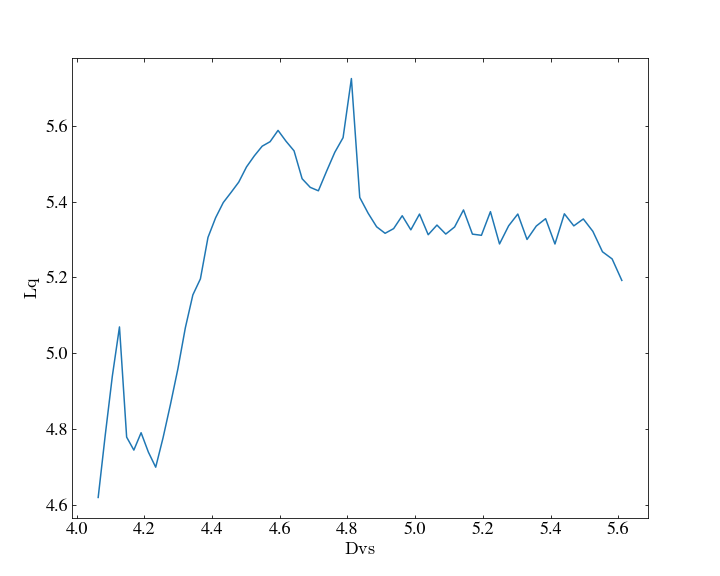

In [89]:
prof = yt.ProfilePlot(ds, 'dvs', 'lQ', weight_field='lQ')
prof.set_log('dvs',False)
prof.set_log('lQ',False)
prof.show()


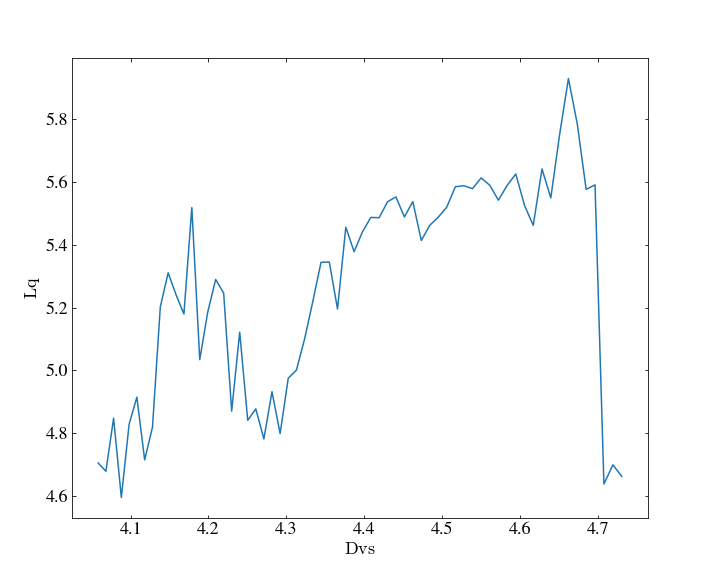


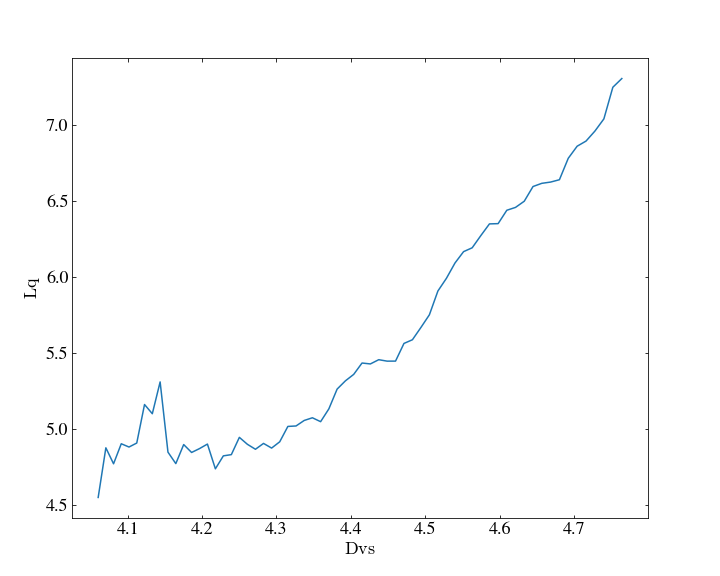


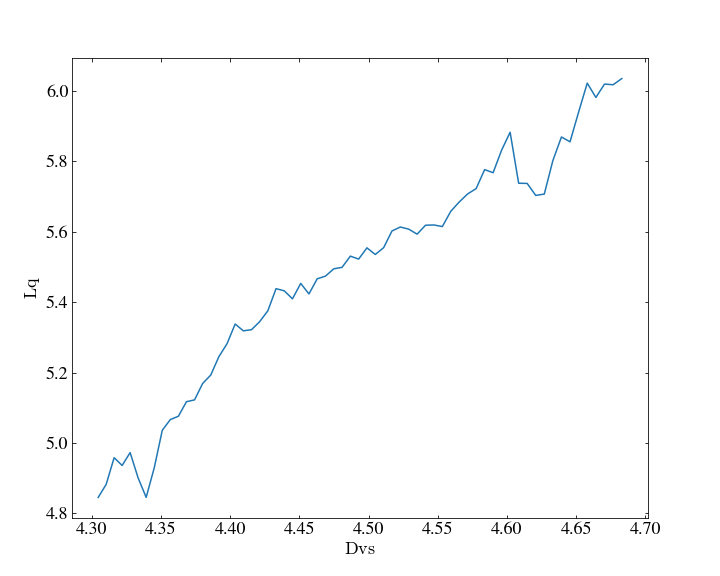


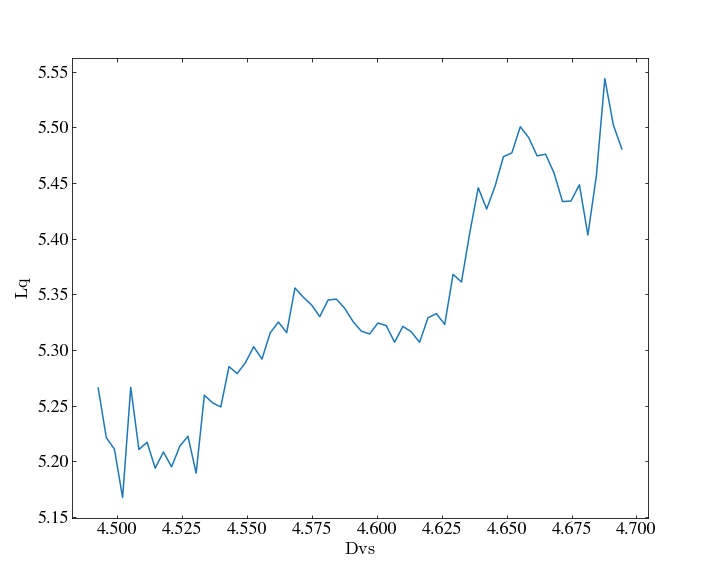

In [92]:
for target_depth in [50,100,200,300]:
    slc = ds.slice("depth",target_depth)
    prof = yt.ProfilePlot(slc, 'dvs', 'lQ', weight_field='lQ')
    prof.set_log('dvs',False)
    prof.set_log('lQ',False)
#     prof.set_title(f"{target_depth} km")
    prof.show()

## extracting data long seismic a raypath



In [83]:
modelfile='GYPSUMS_kmps.nc'
xr_ds = xr.open_dataset(ddir+modelfile)

In [85]:
xr_ds.vs

<xarray.DataArray 'vs' (depth: 112, latitude: 181, longitude: 361)>
[7318192 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.0 4.0 6.0 15.0 ... 2750.0 2800.0 2850.0 2900.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 178.0 179.0 180.0
Attributes:
    long_name:     S-wave Velocity in km/s
    display_name:  S-wave Velocity (kmps)
    units:         km.s-1

In [89]:
bbox = np.array([
    (xr_ds[dim].values[:].min(),xr_ds[dim].values[:].max()) for dim in xr_ds.vs.dims
])
bbox[1][0]=-89.99
bbox[1][1]=89.99
bbox[2][0]=0.001
bbox[2][1]=360 - 0.001

data = {'vs':xr_ds.vs.values}
ds = yt.load_uniform_grid(data,data['vs'].shape,1.0,bbox = bbox, geometry=("internal_geographic",['depth','latitude','longitude']))

yt : [INFO     ] 2021-01-14 10:56:59,196 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-01-14 10:56:59,196 Parameters: domain_dimensions         = [112 181 361]
yt : [INFO     ] 2021-01-14 10:56:59,196 Parameters: domain_left_edge          = [  0.00000000e+00  -8.99899979e+01   1.00000005e-03]
yt : [INFO     ] 2021-01-14 10:56:59,197 Parameters: domain_right_edge         = [ 2900.            89.98999786   359.99899292]
yt : [INFO     ] 2021-01-14 10:56:59,197 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-01-14 10:57:10,463 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2021-01-14 10:57:10,574 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:57:10,574 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:57:10,576 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 10:57:10,576 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 10:57:10,577 Making a fixed resolution buffer of (('stream', 'vs')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)



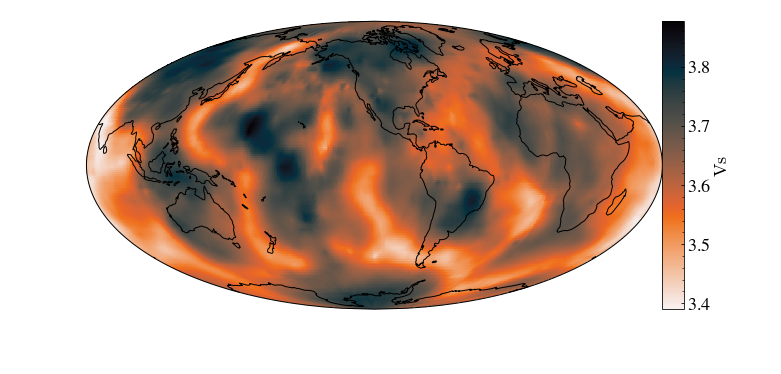

In [90]:

target_depth = 50
center = ds.domain_center
p = yt.SlicePlot(ds,"depth",'vs',center=[target_depth,center[1],center[2]]) 
p.set_cmap('vs', 'dusk_r')
p.set_log('vs', False)
 
p.set_mpl_projection(('Mollweide', (), {'central_longitude':-110}))#{'central_longitude':-100, 'central_latitude':40}))

p._setup_plots()

p.plots['vs'].axes.coastlines()
p.show()




In [91]:
pt = ds.point([50,-5,360.-110])

In [92]:
pt

YTPoint (UniformGridData): , p=[  50.   -5.  250.] cm

In [94]:
pt['vs']

unyt_array([ 3.53744006], '(dimensionless)')

In [122]:
z_vals = np.linspace(50,2800,100)
dvs=[]
for z in z_vals: 
    pt = ds.point([z,-5.,360-110.])
    dvs.append(pt['vs'])
dvs = np.array(dvs)    

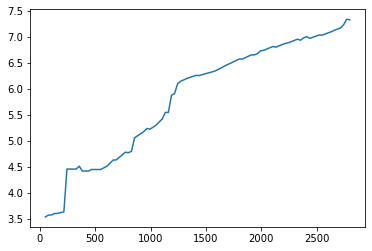

In [123]:
plt.plot(z_vals,dvs)

In [97]:
client = Client()
cat = client.get_events(eventid=3279407)


In [98]:
cat.events


[Event:	2011-03-11T05:46:23.200000Z | +38.296, +142.498 | 9.1 MW

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=3279407")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=18196524")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=176443936")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements]

In [99]:
event = cat.events[0]
depth_km = event.origins[0].depth / 100
lat = event.origins[0].latitude
lon = event.origins[0].longitude
[depth_km,lat,lon]

[197.0, 38.2963, 142.498]

In [100]:
eq_start = LatLon(lat,lon)
station_loc = LatLon(42.3601, -71.0589)
gc_dist_km = eq_start.distanceTo(station_loc) / 1000
gc_dist_deg = gc_dist_km /111. # approx 111 km /deg
gc_dist_deg

93.93204951591332

In [101]:
arrivals = model.get_ray_paths(source_depth_in_km=depth_km,
                               distance_in_degree=gc_dist_deg,
                               phase_list=["P"])

In [48]:
print(arrivals)

1 arrivals
	P phase arrival at 775.090 seconds


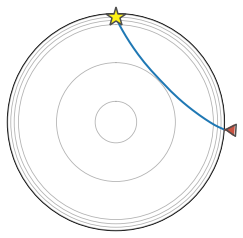

<PolarAxesSubplot:>

In [103]:
arrivals.plot_rays()

In [104]:
path = arrivals[0].path

In [105]:
latlondepths = []
path_frac = np.linspace(0,1,len(path))
for frac,pathpt in zip(path_frac,path):
    ilat,ilon = eq_start.intermediateTo(station_loc,frac).latlon    
    if ilon < 0: 
        ilon = ilon + 360
    latlondepths.append([ilat,ilon,pathpt[3]])

In [118]:
path_vs = []
for lld in latlondepths:     
    pt = ds.point(lld[::-1])
    path_vs.append(pt['vs'])

path_vs = np.array(path_vs)
latlondepths = np.array(latlondepths)

[3, 2, 1]

yt : [INFO     ] 2021-01-14 11:00:06,262 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2021-01-14 11:00:06,271 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 11:00:06,272 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 11:00:06,273 xlim = 0.001000 359.998993
yt : [INFO     ] 2021-01-14 11:00:06,273 ylim = -89.989998 89.989998
yt : [INFO     ] 2021-01-14 11:00:06,274 Making a fixed resolution buffer of (('stream', 'vs')) 800 by 800
/home/chavlin/miniconda3/envs/yt_dev/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)



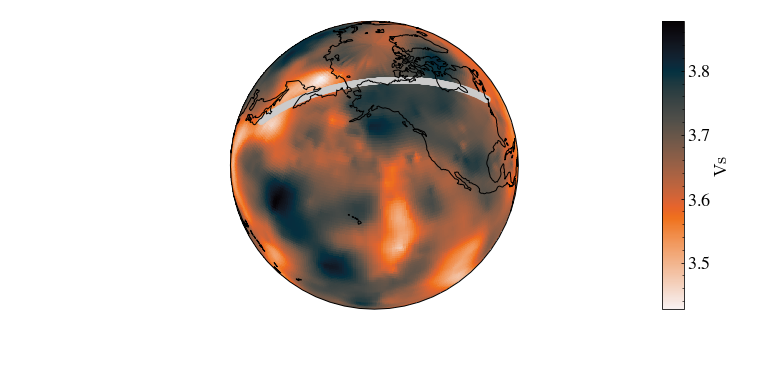

In [107]:

target_depth = 50
center = ds.domain_center
p = yt.SlicePlot(ds,"depth",'vs',center=[target_depth,center[1],center[2]]) 
p.set_cmap('vs', 'dusk_r')
p.set_log('vs', False)
 
p.set_mpl_projection(('NearsidePerspective', (), {'central_longitude':360-150.,'central_latitude':40.}))

p._setup_plots()

p.plots['vs'].axes.coastlines()
p.plots['vs'].axes.scatter(latlondepths[:,1],latlondepths[:,0],
           transform=ccrs.PlateCarree(),color=[.8,.8,.8,.5])
p.show()




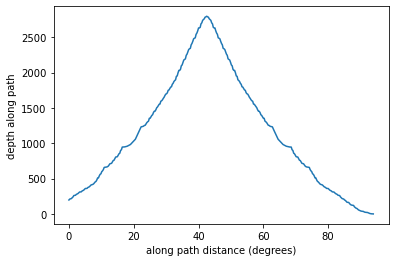

In [119]:

plt.plot(path_frac*gc_dist_deg,depths_km)
plt.xlabel("along path distance (degrees)")
plt.ylabel("depth along path")
plt.show()

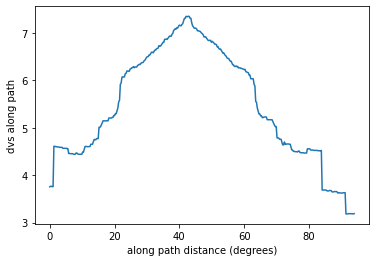

In [120]:
plt.plot(path_frac*gc_dist_deg,path_vs)
plt.xlabel("along path distance (degrees)")
plt.ylabel("dvs along path")
plt.show()


In [70]:
#model = TauPyModel(model="iasp91")
import pandas as pd 
df_iasp91 = pd.read_csv('/home/chavlin/hdd/data/yt_data/IRIS_refModels/IASP91_IDV.csv',header=1)

In [71]:
df_iasp91

,"Depth[unit=""km""]","Radius[unit=""km""]","Vp[unit=""km/s""]","Vs[unit=""km/s""]"
0,0.0,6371.0,5.8000,3.3600
1,1.0,6370.0,5.8000,3.3600
2,2.0,6369.0,5.8000,3.3600
3,3.0,6368.0,5.8000,3.3600
4,4.0,6367.0,5.8000,3.3600
...,...,...,...,...
147,5153.9,1217.1,10.2578,0.0000
148,5153.9,1217.1,11.0914,3.4385
149,5500.0,871.0,11.1644,3.5000
150,6000.0,371.0,11.2270,3.5528


In [72]:
depths_km = latlondepths[:,2]

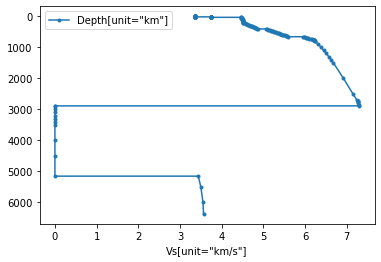

In [79]:
ax = df_iasp91.plot(x='Vs[unit="km/s"]',y=['Depth[unit="km"]'],marker='.')
ax.invert_yaxis()

In [80]:
vs_iasp = np.interp(depths_km, df_iasp91['Depth[unit="km"]'], df_iasp91['Vs[unit="km/s"]'])

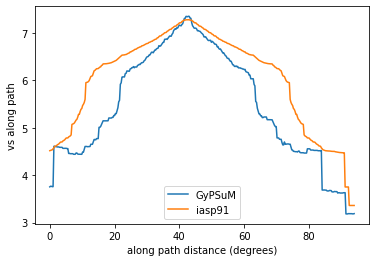

In [130]:
plt.plot(path_frac*gc_dist_deg,path_vs,label='GyPSuM')
plt.plot(path_frac*gc_dist_deg,vs_iasp,label='iasp91')
plt.xlabel("along path distance (degrees)")
plt.ylabel("vs along path")
plt.legend(loc='lower center')
plt.show()

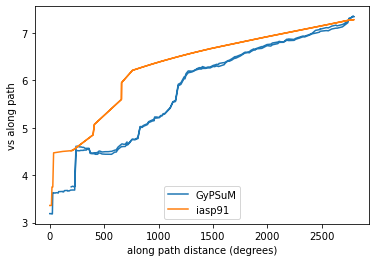

In [133]:
plt.plot(depths_km,path_vs,label='GyPSuM')
plt.plot(depths_km,vs_iasp,label='iasp91')
plt.xlabel("along path distance (degrees)")
plt.ylabel("vs along path")
plt.legend(loc='lower center')
plt.show()

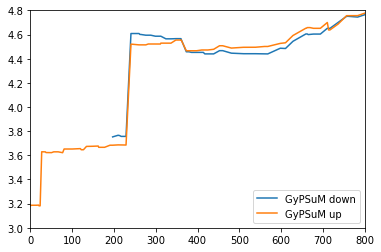

In [139]:
plt.plot(depths_km[path_frac<=0.5],path_vs[path_frac<=0.5],label='GyPSuM down')
plt.plot(depths_km[path_frac>0.5],path_vs[path_frac>0.5],label='GyPSuM up')
plt.ylim([3,4.8])
plt.xlim([0,800])
plt.legend(loc='lower right')